# Digit Recognizer

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch, torchvision
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor

In [25]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
sample = pd.read_csv('dataset/sample_submission.csv')

In [26]:
train_numpy = train.to_numpy()

# the image var is for understanding purpose only
image = train_numpy[3, 1:] # 3rd row, was 4 in the csv

(28, 28) <class 'tuple'>


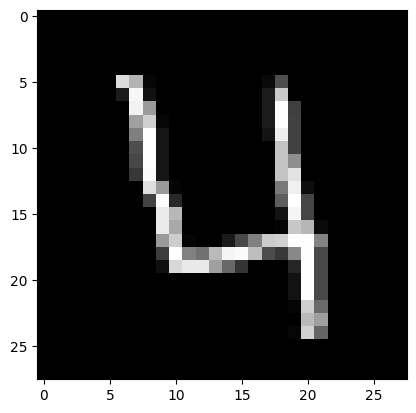

In [27]:
reshaped_image = image.reshape(28, 28)
plt.imshow(reshaped_image, cmap='gray')

print(reshaped_image.shape, type(reshaped_image.shape))

### Let's plan

For the neural network, let's do it as:
784 -> 128 -> 64 -> 10

784 are the pixels of the image, 128 and 64 are the number of neurons in the hidden layers and 10 is the number of classes. 

We will use the ReLU activation function for the hidden layers and the softmax activation function for the output layer.

i.e., ReLU for 128 and 64 neurons and softmax for 10 neurons.

ReLU formula is:

$relu(x) = max(0, x)$

Softmax formula is:

$softmax(x) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

But how will we verify the prediction with the real MNIST dataset? We will use the cross-entropy loss function. And? We will use the gradient descent optimizer to minimize the loss function. How will we show the output of the model? We will use the accuracy metric. 

Format of the result should be like this:

```
ImageId,Label
1,0
2,0
3,0
etc.
```

In [28]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train = train_numpy[:, 1:] # all rows, all columns except the first
Y_train = train_numpy[:, 0] # all rows, only the first column called "label"

print(f"X_train\'s shape: {X_train.shape}\nY_train\'s shape: {Y_train.shape}")

X_train's shape: (42000, 784)
Y_train's shape: (42000,)


This basically means X_train has 42000 rows and 784 columns (pixel0 to pixel783). And Y_train has 42000 elements. When the shape is written as (42000,), the absence of a second dimension after the comma means it’s just a single vector (a 1D array), not a 2D array like X_train.

In [30]:
X_train = X_train / 255.0

---

## Creating a neural network

### Logic

#### 1. Input Layer:

784 nodes: This remains the same, as each input image is still flattened into 784 pixels (28x28).

#### 2. Hidden Layers:

- First hidden layer: 128 nodes (units).

Apply a non-linear activation function like ReLU to introduce non-linearity, allowing the model to learn complex patterns.

- Second hidden layer: 64 nodes (units).

Again, apply ReLU for non-linearity.

#### 3. Output Layer:

10 nodes: This remains the same, since I'm classifying 10 digits (0-9).

Use Softmax as the activation function, which converts the output into probabilities for each of the 10 classes (digits).

Loss: 2.2936224937438965
Loss: 2.282715082168579
Loss: 2.2863306999206543
Loss: 2.287724733352661
Loss: 2.2974722385406494
Loss: 2.294725179672241
Loss: 2.252917528152466
Loss: 2.2749810218811035
Loss: 2.2577319145202637
Loss: 2.2025320529937744
Loss: 2.241899013519287
Loss: 2.1659770011901855
Loss: 2.1373400688171387
Loss: 2.201779365539551
Loss: 2.230679988861084
Loss: 2.1386468410491943
Loss: 2.1595234870910645
Loss: 2.184929370880127
Loss: 2.0073797702789307
Loss: 2.168553590774536
Loss: 1.9861706495285034
Loss: 2.0098273754119873
Loss: 1.9071317911148071
Loss: 1.8835926055908203
Loss: 1.8081403970718384
Loss: 1.7353134155273438
Loss: 1.720672845840454
Loss: 1.6100109815597534
Loss: 1.7835938930511475
Loss: 1.556264042854309
Loss: 1.645370364189148
Loss: 1.5030771493911743
Loss: 1.477250576019287
Loss: 1.5293841361999512
Loss: 1.570824384689331
Loss: 1.309904932975769
Loss: 1.303633451461792
Loss: 1.1383330821990967
Loss: 1.230017900466919
Loss: 1.1434967517852783
Loss: 1.333822965

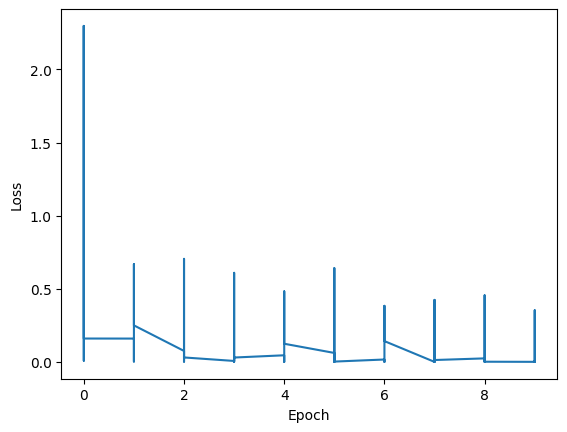

In [31]:
# 1. Import libraries (PyTorch, etc.)
# 2. Define a neural network class:
#    - Inherit from `torch.nn.Module`
#    - Define layers in `__init__`
#    - Implement `forward` method
# 3. Initialize the network
# 4. Choose an optimizer and loss function
# 5. Write the training loop:
#    - Loop through batches of data
#    - Perform forward pass, calculate loss
#    - Backpropagate and update weights
# 6. Evaluate model on validation/test data

# a class that allows us to specify the number of neurons in each layer
class MNIST(nn.Module):
    def __init__(self):
        super(MNIST, self).__init__()
        self.fc1 = nn.Linear(784, 128) # 784 input neurons, 128 output neurons
        self.fc2 = nn.Linear(128, 128) # 128 input neurons, 128 output neurons
        self.fc3 = nn.Linear(128, 128) # 128 input neurons, 128 output neurons
        self.fc4 = nn.Linear(128, 10) # 128 input neurons, 10 output neurons (0-9)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
model = MNIST()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0009)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

loss_for_plot = []
epoch_for_plot = []

for epoch in range(10):
    for batch in train_loader:
        X_batch, Y_batch = batch
        Y_pred = model(X_batch)
        loss = loss_fn(Y_pred, Y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Loss: {loss.item()}")
        epoch_for_plot.append(epoch)
        loss_for_plot.append(loss.item())

# plot the optimizer graph
plt.plot(epoch_for_plot, loss_for_plot)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [32]:
# Test the model
test_numpy = test.to_numpy()
X_test = test_numpy / 255.0
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

predictions = []
model.eval()

for batch in test_loader:
    X_batch = batch[0]
    Y_pred = model(X_batch)
    predictions.extend(Y_pred.argmax(dim=1).tolist())

sample['Label'] = predictions
sample.to_csv('./dataset/submission.csv', index=False)

print("Done!")

Done!


In [33]:
accuracy_of_model = 0
total = 0
correct = 0

for batch in train_loader:
    X_batch, Y_batch = batch
    Y_pred = model(X_batch)
    correct += (Y_pred.argmax(dim=1) == Y_batch).sum().item()
    total += len(Y_batch)

accuracy_of_model = correct / total
print(f"Accuracy of the model: {accuracy_of_model * 100}%")


Accuracy of the model: 99.52142857142857%


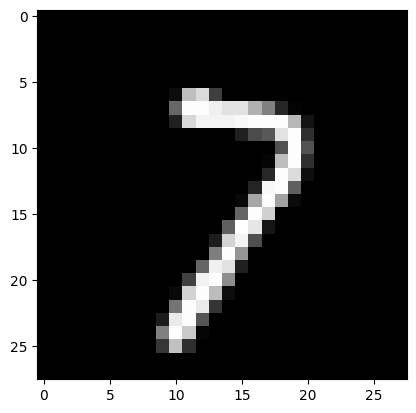

Prediction: 7


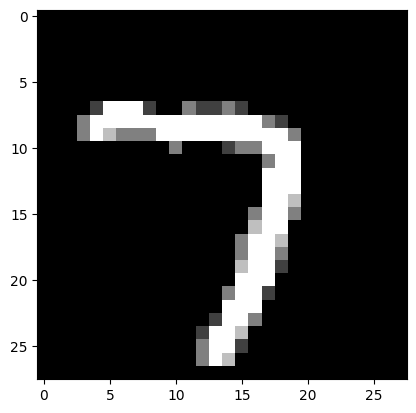

Prediction: 7


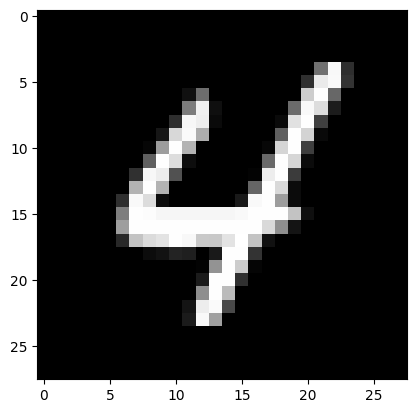

Prediction: 4


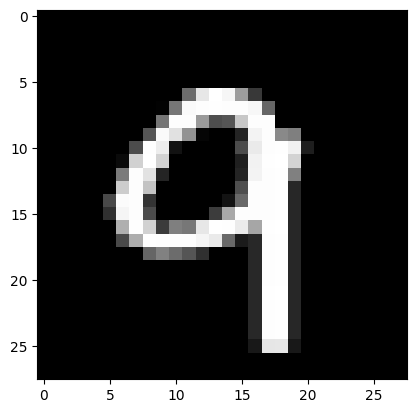

Prediction: 9


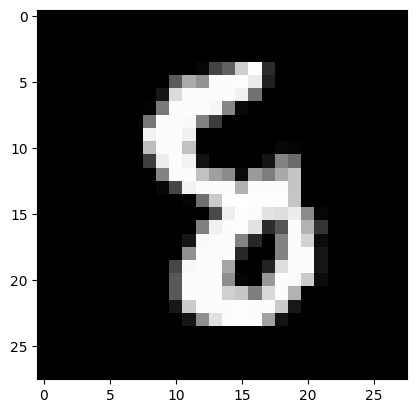

Prediction: 8


In [34]:
# visualizing some test.csv digits

X_test_for_visualization = pd.read_csv('dataset/test.csv').to_numpy()

for i in range(5):
    reshaped_image = X_test_for_visualization[i+40].reshape(28, 28)
    plt.imshow(reshaped_image, cmap='gray')
    plt.show()
    print(f"Prediction: {predictions[i+40]}")